In [1]:
import cobra
import pandas as pd
import re
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from pathlib import Path
import sys
sys.path.append('../../code/')
import leakage, utils
import seaborn as sns
from matplotlib import cm, colors
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

# Read files, define colormap etc

In [2]:
# df = pd.read_csv('spreadsheet_ecoli_leakage_and_info_230626_owd_significant.csv', index_col = 0)
only_significant_changes = False
timepoints = np.arange(0.5, 12, 1)
knock_outs = False
shadow_price_for_leaked_mets = True


#################
if only_significant_changes:
    s1 = '_osc'
else:
    s1 = ''

if shadow_price_for_leaked_mets:
    s2 = '_SP_for_leaked'
else:
    s2 = ''

if knock_outs:
    s3 = '_KO'
else:
    s3 = ''
    

species = 'yeast'
timestr = '20230705'
fn = 'spreadsheet_{0}_leakage_{1}{2}{3}{4}.csv'.format(species, timestr, s1, s2, s3)
folder = Path('../../results/{0}/'.format(species))

df = pd.read_csv(folder / fn, index_col = 0)

In [3]:
# df['log10(Leakage [mmol/gDW/h])'] = df['log10(leakage)']
df['Shadow price [gDW/mmol]'] = df['Shadow price']
df['log10(-Shadow price [gDW/mmol])'] = df['log10(-Shadow price [gDW/mmol)']
# df['log10(Turnover [mmol/gDW/h])'] = df['log10(Turnover)']

In [4]:
df.columns

Index(['Metabolite name', 'Metabolite id', 'Mass', 'Charge', 'Phosphate',
       'Topological Polar Surface Area []', 'Concentration', 'log P',
       'Leakage (mmol/gDW/h)', 'Yeast metabolite', 'Bacillus metabolite',
       'Time', 'Glucose', 'Predicted growth rate', 'Shadow price', 'Turnover',
       'Uptake (mmol/gDW/h)', 'log10(Leakage [mmol/gDW/h])',
       'log10(-Shadow price [gDW/mmol)', 'log10(Turnover [mmol/gDW/h])',
       'Shadow price [gDW/mmol]', 'log10(-Shadow price [gDW/mmol])'],
      dtype='object')

In [5]:
cmap40 = colors.ListedColormap(cm.tab20b.colors[4:] + cm.tab20c.colors, name='tab40')
cmap40(34)

(0.7411764705882353, 0.7411764705882353, 0.7411764705882353, 1.0)

# Scatterplots and time-traces of specific parameters
- Shadow price
- log10(-Shadow price) is [gDW/mM]
- Turnover
- log P?
- Charge?


In [6]:
hours = [3.5,4.5,5.5,6.5,7.5,8.5]

In [7]:
df.columns

Index(['Metabolite name', 'Metabolite id', 'Mass', 'Charge', 'Phosphate',
       'Topological Polar Surface Area []', 'Concentration', 'log P',
       'Leakage (mmol/gDW/h)', 'Yeast metabolite', 'Bacillus metabolite',
       'Time', 'Glucose', 'Predicted growth rate', 'Shadow price', 'Turnover',
       'Uptake (mmol/gDW/h)', 'log10(Leakage [mmol/gDW/h])',
       'log10(-Shadow price [gDW/mmol)', 'log10(Turnover [mmol/gDW/h])',
       'Shadow price [gDW/mmol]', 'log10(-Shadow price [gDW/mmol])'],
      dtype='object')

<Axes: xlabel='log10(-Shadow price [gDW/mmol])', ylabel='log10(Leakage [mmol/gDW/h])'>

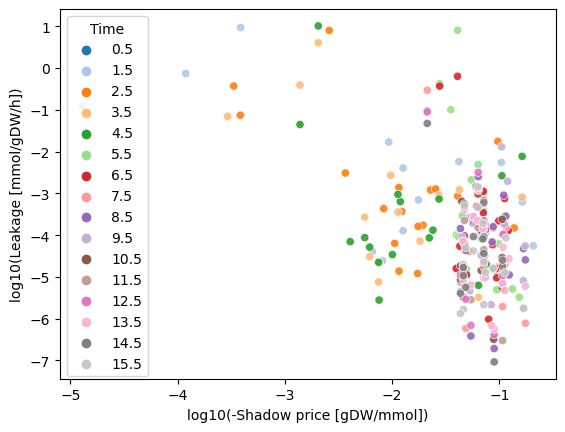

In [8]:
# sns.scatterplot(data = df, x = 'Shadow price', y = 'log10(Leakage [mmol/gDW/h])', hue = 'Time', palette = 'tab20', alpha = 0.9)
sns.scatterplot(data = df, x = 'log10(-Shadow price [gDW/mmol])', y = 'log10(Leakage [mmol/gDW/h])', hue = 'Time', palette = 'tab20', alpha = 0.9)

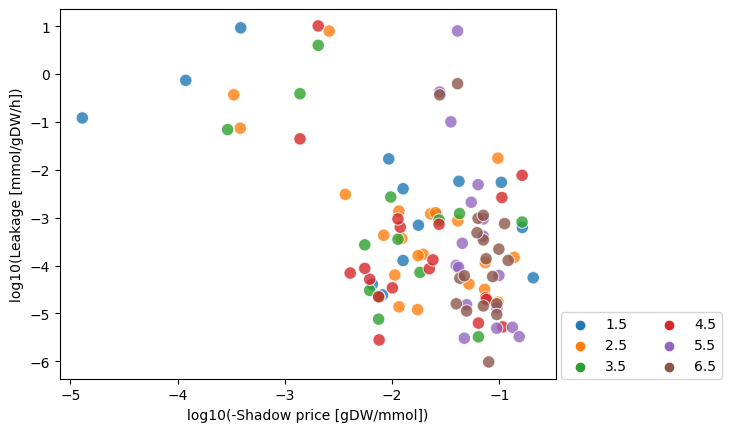

In [9]:
hours = np.arange(1.5, 7)
ax = sns.scatterplot(data = df.loc[df.Time.isin(hours),:], x = 'log10(-Shadow price [gDW/mmol])', y = 'log10(Leakage [mmol/gDW/h])', 
                     hue = 'Time', alpha = 0.8, palette = 'tab10', s = 80)
ax.legend(ncol = 2, loc = (1.01, 0))

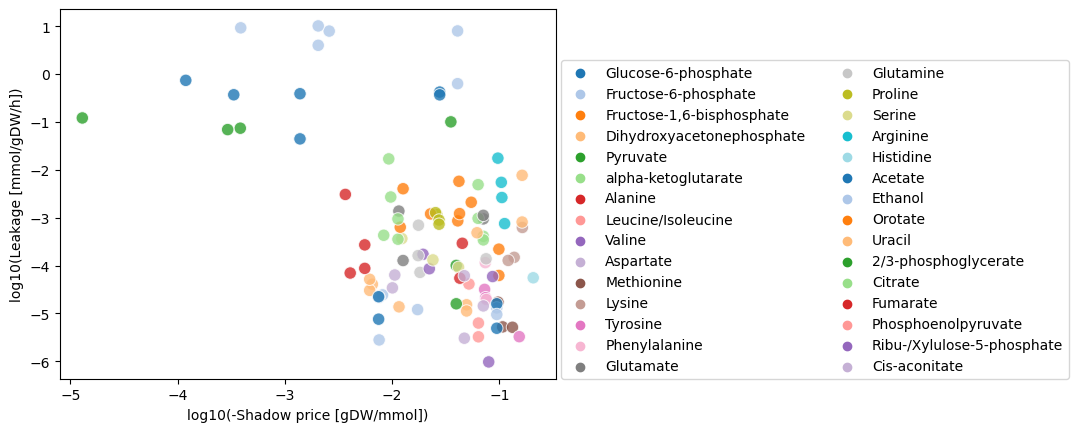

In [10]:
# hours = np.arange(1.5, 6)
# p = sns.color_palette(cmap40.colors, len(cmap40.colors))
ax = sns.scatterplot(data = df.loc[df.Time.isin(hours),:], x = 'log10(-Shadow price [gDW/mmol])', y = 'log10(Leakage [mmol/gDW/h])', 
                      hue = 'Metabolite name', alpha = 0.8, s = 80, palette = 'tab20')
ax.legend(ncol = 2, loc = (1.01, 0))

In [11]:
sns.color_palette??

Signature: sns.color_palette(palette=None, n_colors=None, desat=None, as_cmap=False)
Source:   
def color_palette(palette=None, n_colors=None, desat=None, as_cmap=False):
    """Return a list of colors or continuous colormap defining a palette.

    Possible ``palette`` values include:
        - Name of a seaborn palette (deep, muted, bright, pastel, dark, colorblind)
        - Name of matplotlib colormap
        - 'husl' or 'hls'
        - 'ch:<cubehelix arguments>'
        - 'light:<color>', 'dark:<color>', 'blend:<color>,<color>',
        - A sequence of colors in any format matplotlib accepts

    Calling this function with ``palette=None`` will return the current
    matplotlib color cycle.

    This function can also be used in a ``with`` statement to temporarily
    set the color cycle for a plot or set of plots.

    See the :ref:`tutorial <palette_tutorial>` for more information.

    Parameters
    ----------
    palette : None, string, or sequence, optional
        Name of p

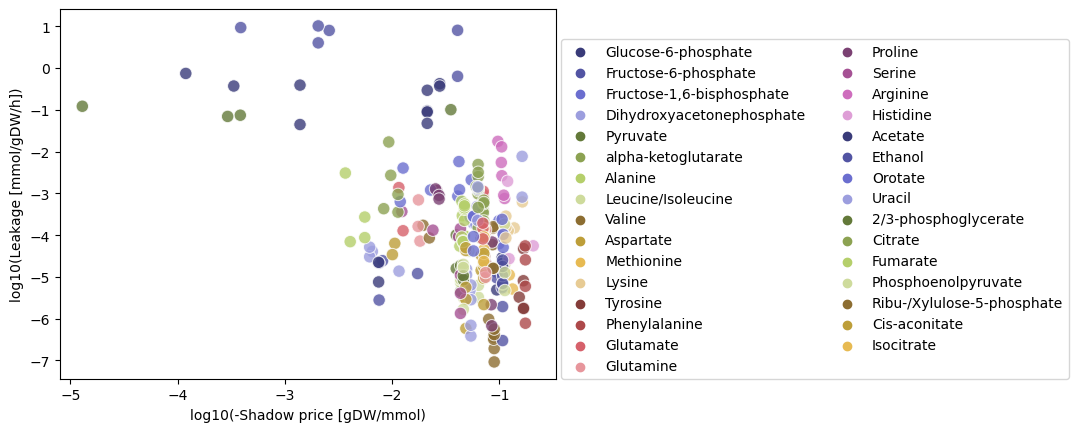

In [12]:
ax = sns.scatterplot(data = df, x = 'log10(-Shadow price [gDW/mmol)', y = 'log10(Leakage [mmol/gDW/h])', 
                     hue = 'Metabolite name', alpha = 0.8, palette = 'tab20b', s = 80) # .loc[df.Time.isin([5.5, 6.5, 7.5, 8.5]),:]
ax.legend(ncol = 2, loc = (1.01, 0))


Text(0, 0.5, 'log10(Leakage [mmol/gDW/h])')

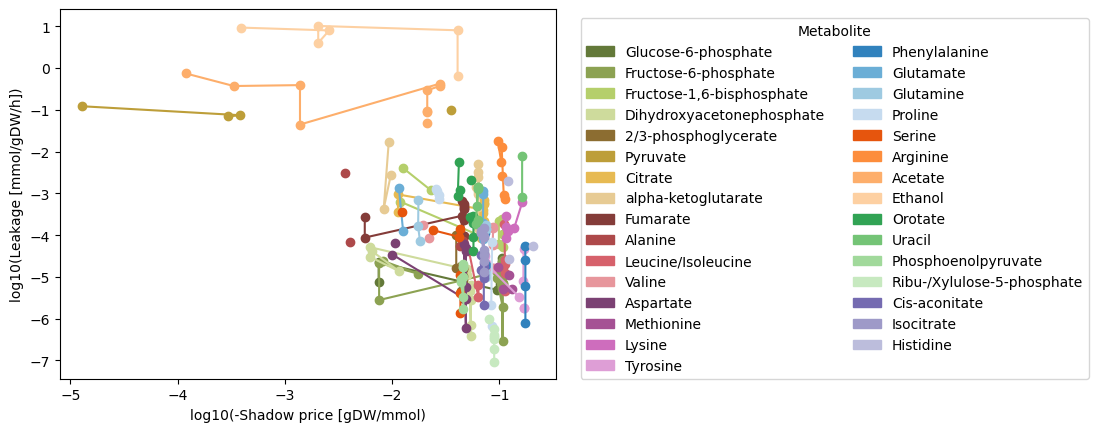

In [13]:
fig, ax = plt.subplots(1)
hours = np.arange(3.5,15,1)
x = 'log10(-Shadow price [gDW/mmol)'
y = 'log10(Leakage [mmol/gDW/h])'
# corr = []
mnames = df.loc[df.Time.isin(hours), 'Metabolite name'].unique()

for j, m in enumerate(mnames):
    dfm = df.loc[df['Metabolite name']==m,:]
    ax.plot(dfm[x], dfm[y], c = cmap40(j), marker = 'o')
    # ax.scatter(dfm[x], dfm[y], c = cmap40(j))
    # print(dfm)

patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
l1 = plt.legend(handles=patches, ncol = 2, loc = (1.05,0), title = 'Metabolite')

plt.xlabel(x)
plt.ylabel(y)

In [14]:
df.max()

Metabolite name                       alpha-ketoglutarate
Metabolite id                                      val__L
Mass                                           336.083922
Charge                                                1.0
Phosphate                                               2
Topological Polar Surface Area []                  215.0
Concentration                                       0.096
log P                                                 0.4
Leakage (mmol/gDW/h)                            10.160132
Yeast metabolite                                   s_1550
Bacillus metabolite                                val__L
Time                                                 15.5
Glucose                                         35.782341
Predicted growth rate                            0.376825
Shadow price                                    -0.000013
Turnover                                        23.354808
Uptake (mmol/gDW/h)                              2.638044
log10(Leakage 

In [15]:
hours

array([ 3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5,
       14.5])

Text(0.99, 0.9, 'Spearman ρ = -0.36, p-value = 1.82e-04')

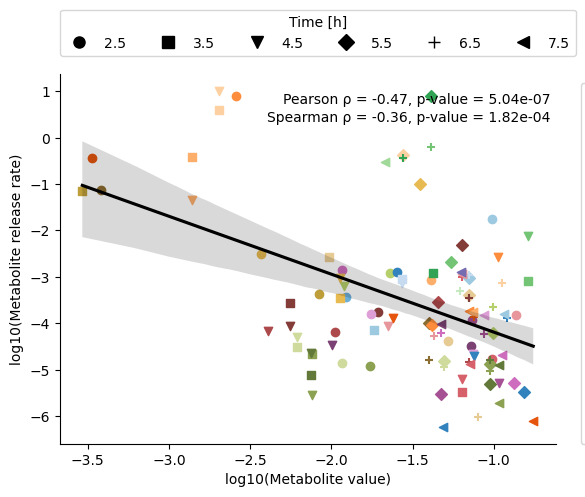

In [81]:
fig, ax = plt.subplots(1)#, figsize = (8, 12)
hours = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
x = 'Shadow price [gDW/mmol]'
x = 'log10(-Shadow price [gDW/mmol)'
y = 'log10(Leakage [mmol/gDW/h])'
symbols = ['o', 's', 'v', 'D', '+', '<', '>']
hours_string = ['2 - 3','3 - 4', '4 - 5', '5 - 6', '6 - 7', '7 - 8']
corr = []
all_xy = []
mnames = df.loc[df.Time.isin(hours), 'Metabolite name'].unique()
for i, t in enumerate(hours):
    x_arr = df.loc[df.Time==t, x]
    y_arr = df.loc[df.Time==t, y]
    l_arr = df.loc[df.Time==t, 'Metabolite name']
    xy_corr = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if not np.isnan(yj) and not np.isnan(xj):
            xy_corr.append([xj,yj])
            ax.scatter(xj, yj, marker = symbols[i], color = cmap40(j), label = l_arr[j])
        else:
            # print(t, l_arr[j])
            pass
    all_xy += xy_corr
    corr.append(st.pearsonr([x[0] for x in xy_corr],[x[1] for x in xy_corr]))
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          markersize=8, label=t) for m,t in zip(symbols, hours)]
l1 = plt.legend(handles=patches, ncol = 2, loc = (1.05,0), title = 'Metabolite')
plt.legend(handles=patches2, ncol = 23, loc = (0,1.05), title = 'Time [h]')
plt.gca().add_artist(l1)
all_x_arr = df.loc[df.Time.isin(hours), x]
all_y_arr = df.loc[df.Time.isin(hours), y]
sns.regplot(x=all_x_arr, y = all_y_arr, ax = ax, scatter = False, color = 'k', ci = 95)
plt.xlabel('log10(Metabolite value)')
plt.ylabel('log10(Metabolite release rate)')
sns.despine()
prho, ppval = st.pearsonr([x[0] for x in all_xy],[x[1] for x in all_xy])
srho, spval = st.spearmanr([x[0] for x in all_xy],[x[1] for x in all_xy])

ax.text(0.99, 0.95, 'Pearson ρ = {0:.2f}, p-value = {1:.2e}'.format(prho, ppval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = ax.transAxes)
ax.text(0.99, 0.9, 'Spearman ρ = {0:.2f}, p-value = {1:.2e}'.format(srho, spval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = ax.transAxes)
# plt.tight_layout()

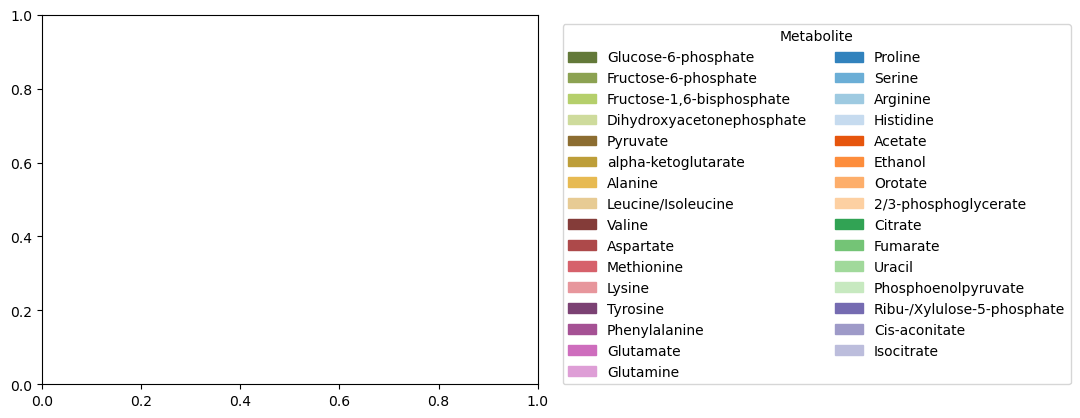

In [62]:
plt.legend(handles=patches, ncol = 2, loc = (1.05,0), title = 'Metabolite')

# Correlations between lekage rates and chosen parameters

4.5 2/3-phosphoglycerate 4 -2.6 -inf
4.5 Pyruvate 5 -0.6 nan
4.5 alpha-ketoglutarate 7 -0.9 nan
4.5 Lysine 14 -3.0 nan
4.5 Glutamate 17 -3.7 nan
4.5 Glutamine 18 -3.1 nan
4.5 Orotate 24 -0.8 nan
5.5 Phosphoenolpyruvate 5 -1.1 -inf
5.5 Alanine 10 -3.0 nan
5.5 Leucine/Isoleucine 11 -1.6 nan
5.5 Valine 12 -2.3 nan
5.5 Lysine 15 -3.0 nan
5.5 Phenylalanine 17 -1.5 nan
5.5 Glutamine 19 -3.1 nan
5.5 Proline 20 -2.5 nan
5.5 Arginine 22 -4.2 nan
5.5 Uracil 26 -1.1 nan
6.5 Phosphoenolpyruvate 5 -1.1 -inf
6.5 Pyruvate 6 -0.6 nan
6.5 Leucine/Isoleucine 12 -1.6 nan
6.5 Methionine 15 -1.9 nan
6.5 Tyrosine 17 -2.3 nan
6.5 Phenylalanine 18 -1.5 nan
6.5 Proline 21 -2.5 nan
6.5 Serine 22 -3.1 nan
6.5 Orotate 26 -0.8 nan


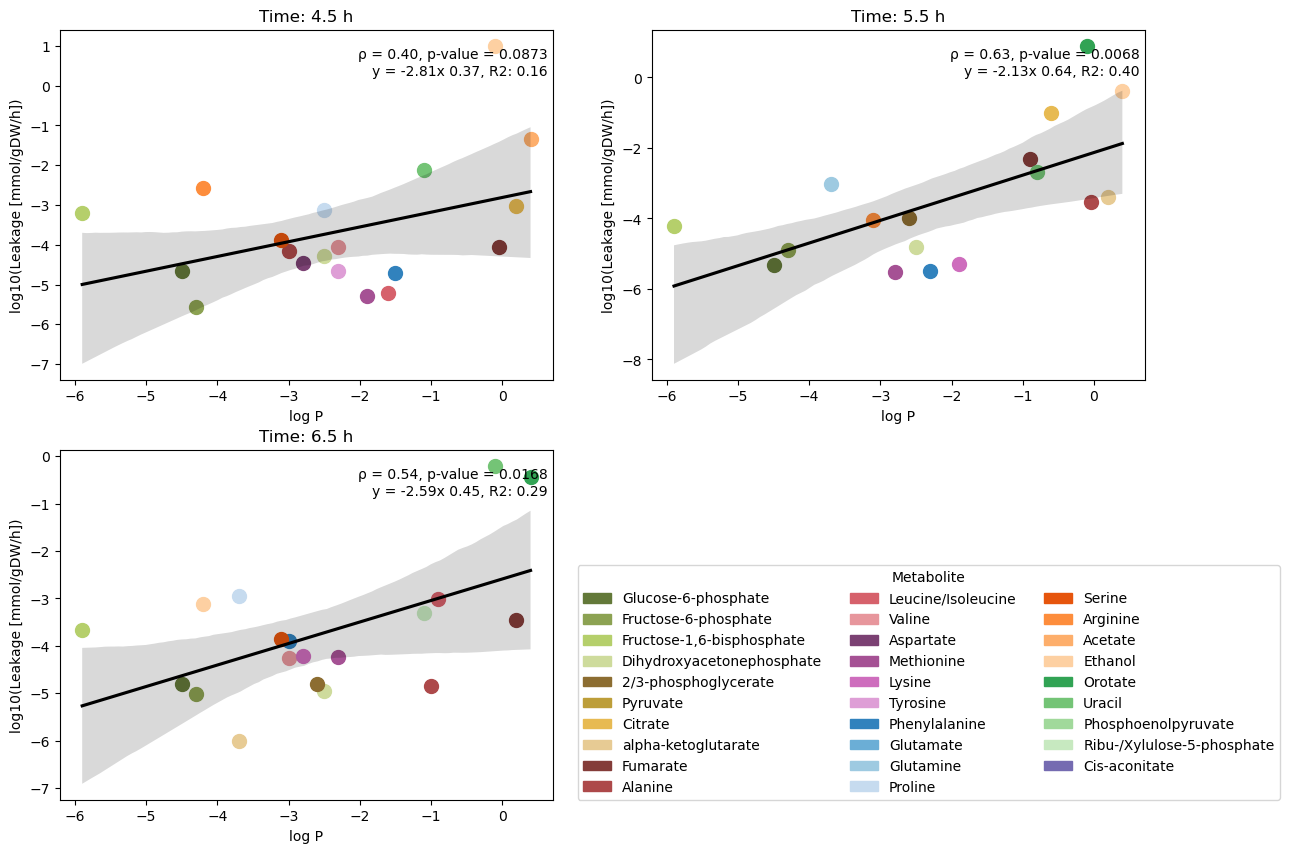

In [91]:
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize = (14, 10))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax3 = fig.add_subplot(gs[1, 0]) # row 1, span all columns

axes = [ax1,ax2,ax3]
# fig, axes = plt.subplots(2,2, )
# axes = axes.flatten()
hours = np.array([1.5, 2.5, 3.5])+3
# x = 'log10(Turnover)'
# x = 'log10(-Shadow price [gDW/mmol)'
x = 'log P'
y = 'log10(Leakage [mmol/gDW/h])'
symbols = ['o', 's', 'v', 'D']
corr = []
mnames = df.loc[df.Time.isin(hours), 'Metabolite name'].unique()
for i, t in enumerate(hours):
    x_arr = df.loc[df.Time==t, x]
    y_arr = df.loc[df.Time==t, y]
    l_arr = df.loc[df.Time==t, 'Metabolite name']
    xc = []
    yc = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if np.isfinite(yj) and np.isfinite(xj):
            xc.append(xj)
            yc.append(yj)
            axes[i].scatter(xj, yj, color = cmap40(j), label = l_arr[j], s = 100)#marker = symbols[i]
        else:
            print(t, l_arr[j],j, xj, yj)
    rho, pval = st.pearsonr(xc,yc)
    corr.append((rho, pval))
    
    axes[i].text(0.99, 0.95, 'ρ = {0:.2f}, p-value = {1:.4f}'.format(rho, pval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = axes[i].transAxes)
    axes[i].set_title('Time: {0} h'.format(t))
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    sns.regplot(x=xc, y = yc, ax = axes[i], scatter = False, color = 'k', ci = 95)
    
    X = sm.add_constant(xc)
    model = sm.OLS(yc, X)
    res = model.fit()
    # print(res.summary())
    axes[i].text(0.99, 0.9, 'y = {0:.2f}x {1:0.2f}, R2: {2:.2f}'.format(res.params[0], res.params[1], res.rsquared),
     horizontalalignment='right', verticalalignment='top', transform = axes[i].transAxes)
    
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          # markersize=8, label=t) for m,t in zip(symbols, hours)]
l1 = plt.legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.legend(handles=patches2, ncol = 23, loc = (0,1.05), title = 'Time [h]')
# plt.gca().add_artist(l1)

# plt.xlabel(x)
# plt.ylabel(y)
# plt.tight_layout()

6.5 Phosphoenolpyruvate 5 -3.0 -inf
6.5 Pyruvate 6 -1.0 nan
6.5 Leucine/Isoleucine 12 0.0 nan
6.5 Methionine 15 0.0 nan
6.5 Tyrosine 17 0.0 nan
6.5 Phenylalanine 18 0.0 nan
6.5 Proline 21 0.0 nan
6.5 Serine 22 0.0 nan
6.5 Orotate 26 -1.0 nan
7.5 Fructose-1,6-bisphosphate 2 -4.0 nan
7.5 Dihydroxyacetonephosphate 3 -2.0 nan
7.5 2/3-phosphoglycerate 4 -3.0 nan
7.5 Phosphoenolpyruvate 5 -3.0 -inf
7.5 Pyruvate 6 -1.0 nan
7.5 Ribu-/Xylulose-5-phosphate 7 -2.0 nan
7.5 Citrate 8 -3.0 nan
7.5 Cis-aconitate 9 -3.0 nan
7.5 Alanine 13 0.0 nan
7.5 Methionine 17 0.0 nan
7.5 Tyrosine 19 0.0 nan
7.5 Proline 23 0.0 nan
7.5 Serine 24 0.0 nan
7.5 Arginine 25 1.0 nan
7.5 Ethanol 27 0.0 nan
8.5 Fructose-6-phosphate 1 -2.0 nan
8.5 Pyruvate 6 -1.0 -inf
8.5 Alanine 13 0.0 nan
8.5 Glutamate 21 -1.0 nan
8.5 Ethanol 27 0.0 nan


/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


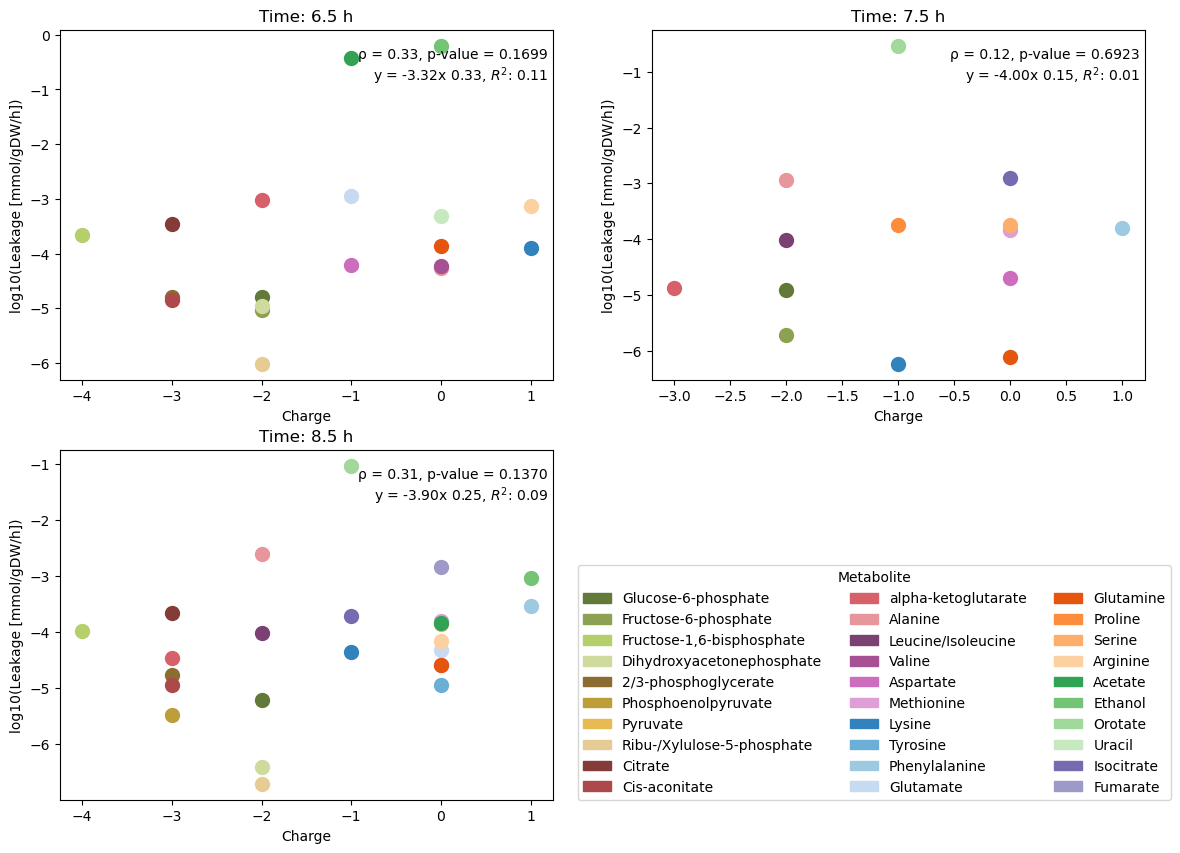

In [72]:


# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize = (14, 10))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax3 = fig.add_subplot(gs[1, 0]) # row 1, span all columns
axes = [ax1,ax2,ax3]
# fig, axes = plt.subplots(2,2, )
# axes = axes.flatten()
hours = [6.5, 7.5, 8.5]
# x = 'Shadow price [gDW/mmol]'
# x = 'Charge'
# x = 'log10(Turnover)'
y = 'log10(Leakage [mmol/gDW/h])'
symbols = ['o', 's', 'v', 'D']
corr = []
mnames = df.loc[df.Time.isin(hours), 'Metabolite name'].unique()
for i, t in enumerate(hours):
    x_arr = df.loc[df.Time==t, x]
    y_arr = df.loc[df.Time==t, y]
    l_arr = df.loc[df.Time==t, 'Metabolite name']
    xc = []
    yc = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if np.isfinite(yj) and np.isfinite(xj):
            xc.append(xj)
            yc.append(yj)
            axes[i].scatter(xj, yj, color = cmap40(j), label = l_arr[j], s = 100)#marker = symbols[i]
        else:
            print(t, l_arr[j], j, xj, yj)
    rho, pval = st.pearsonr(xc,yc)
    corr.append((rho, pval))
    
    axes[i].text(0.99, 0.95, 'ρ = {0:.2f}, p-value = {1:.4f}'.format(rho, pval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = axes[i].transAxes)
    axes[i].set_title('Time: {0} h'.format(t))
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    sns.regplot(x=x_arr, y = y_arr, ax = axes[i], scatter = False, color = 'k', ci = 95)
    
    X = sm.add_constant(xc)
    model = sm.OLS(yc, X)
    res = model.fit()
    # print(res.summary())
    axes[i].text(0.99, 0.9, 'y = {0:.2f}x {1:0.2f}, $R^2$: {2:.2f}'.format(res.params[0], res.params[1], res.rsquared),
     horizontalalignment='right', verticalalignment='top', transform = axes[i].transAxes)
    
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          # markersize=8, label=t) for m,t in zip(symbols, hours)]
l1 = plt.legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.legend(handles=patches2, ncol = 23, loc = (0,1.05), title = 'Time [h]')
# plt.gca().add_artist(l1)

# plt.xlabel(x)
# plt.ylabel(y)
# plt.tight_layout()

# All correlations

In [11]:
cols_for_corr = ['Mass',
       'Charge', 'Phosphate', 'Topological Polar Surface Area [Å]',
       # 'Concentration', 
       # 'Shadow price [gDW/mmol]',
                 'log10(-Shadow price [gDW/mmol)',
       'log10(Turnover [mmol/gDW/h])', 'log P']


In [28]:
df['Topological Polar Surface Area [Å]'] = df['Topological Polar Surface Area []']

## "timecourse" for correlations for all parameters

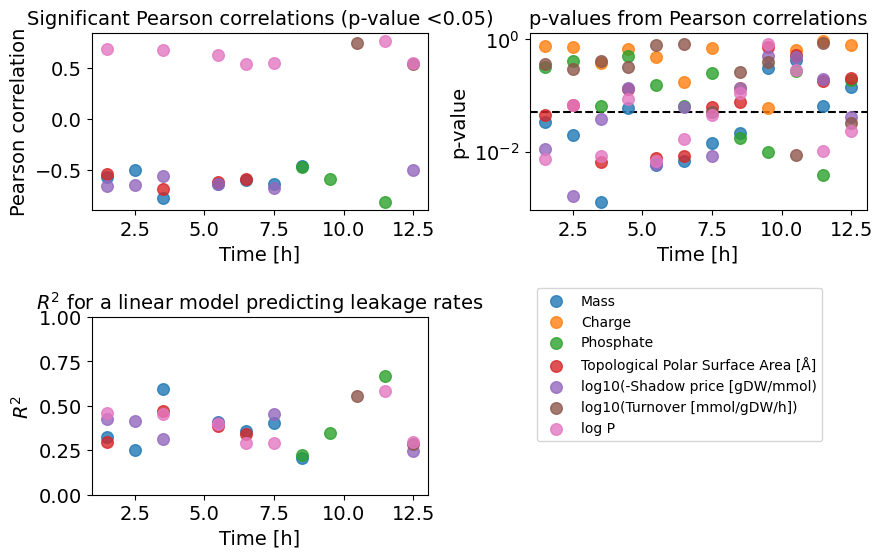

In [29]:
# Create 2x2 sub plots
fig, axes = plt.subplots(2,2, figsize = (10,6))
[ax1,ax2,ax3, ax4] = axes.flatten()
hours = df.Time.unique()
y = 'log10(Leakage [mmol/gDW/h])'
pval_lim = 0.05
for i, c in enumerate(cols_for_corr):
    corr = []
    pvals = np.zeros(len(hours))
    rhos = np.zeros(len(hours))
    r2s = np.zeros(len(hours))
    for k, h in enumerate(hours):
        dft = df.loc[df.Time==h, [c, y]]
        x_arr = dft[c]
        y_arr = dft[y]
        
        xc = []
        yc = []
        for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
            if np.isfinite(yj) and np.isfinite(xj):
                xc.append(xj)
                yc.append(yj)
                
        rho, pvals[k] = st.pearsonr(xc,yc)
        X = sm.add_constant(xc)
        model = sm.OLS(yc, X)
        res = model.fit()
        
        if pvals[k] < pval_lim:
            rhos[k] = rho
            r2s[k] = res.rsquared
        else:
            rhos[k] = np.nan
            r2s[k] = np.nan
            
            
    ax1.scatter(hours, rhos, label = c, s = 70, alpha = 0.8)
    ax2.scatter(hours, pvals,label = c, s = 70, alpha = 0.8)
    ax3.scatter(hours, r2s, label = c, s = 70, alpha = 0.8)
    
ax2.axhline(pval_lim, c = 'k', ls = '--', zorder = -1)
for ax in [ax1,ax2,ax3]:
    ax.set_xlabel('Time [h]', fontdict = {'size':14})
    ax.tick_params(axis='both', which='major', labelsize=14)
ax1.set_ylabel('Pearson correlation', fontdict = {'size':14})
ax2.set_yscale('log')
ax2.set_ylabel('p-value', fontdict = {'size':14})
ax3.set_ylabel('$R^2$', fontdict = {'size':14})
ax3.set_ylim(0,1)
ax2.legend(loc='upper left', bbox_to_anchor=(0., -0.4), ncol = 1)
ax2.set_title('p-values from Pearson correlations', fontdict = {'size':14})
ax1.set_title('Significant Pearson correlations (p-value <{0})'.format(pval_lim), fontdict = {'size':14})
ax3.set_title('$R^2$ for a linear model predicting leakage rates', fontdict = {'size':14})
ax4.set_axis_off()

plt.subplots_adjust(hspace = 0.6, wspace = 0.3)
# patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# # patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
#                           # markersize=8, label=t) for m,t in zip(symbols, hours)]
# l1 = axes[N-1].legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.tight_layout()

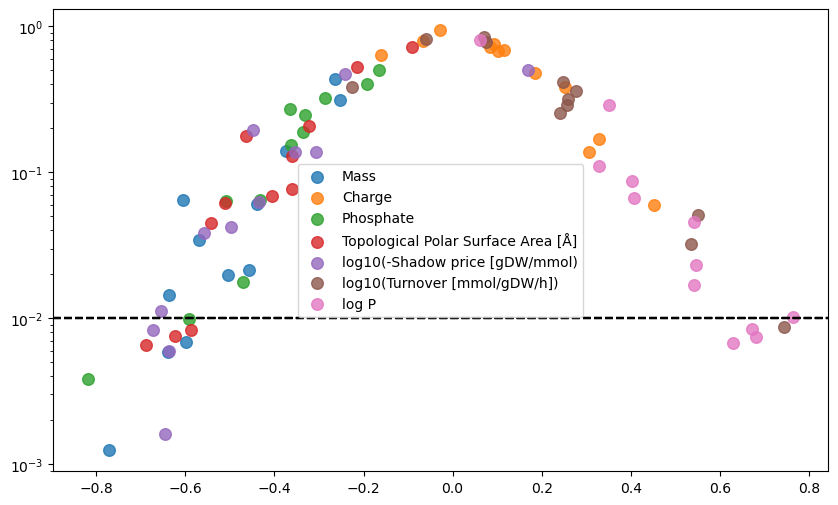

In [18]:
# Create 2x2 sub plots
fig, ax1 = plt.subplots(1,1, figsize = (10,6))
# [ax1,ax2,ax3, ax4] = axes.flatten()
hours = df.Time.unique()
y = 'log10(Leakage [mmol/gDW/h])'
p_val_lim = 0.01
for i, c in enumerate(cols_for_corr):
    corr = []
    pvals = np.zeros(len(hours))
    rhos = np.zeros(len(hours))
    r2s = np.zeros(len(hours))
    for k, h in enumerate(hours):
        dft = df.loc[df.Time==h, [c, y]]
        x_arr = dft[c]
        y_arr = dft[y]
        
        xc = []
        yc = []
        for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
            if np.isfinite(yj) and np.isfinite(xj):
                xc.append(xj)
                yc.append(yj)
                
        rho, pvals[k] = st.pearsonr(xc,yc)
        rhos[k] = rho
        # X = sm.add_constant(xc)
        # model = sm.OLS(yc, X)
        # res = model.fit()
    ax1.scatter(rhos, pvals,label = c, s = 70, alpha = 0.8)
    ax1.set_yscale('log')
    ax1.axhline(0.01, c = 'k', ls = '--')
    plt.legend()

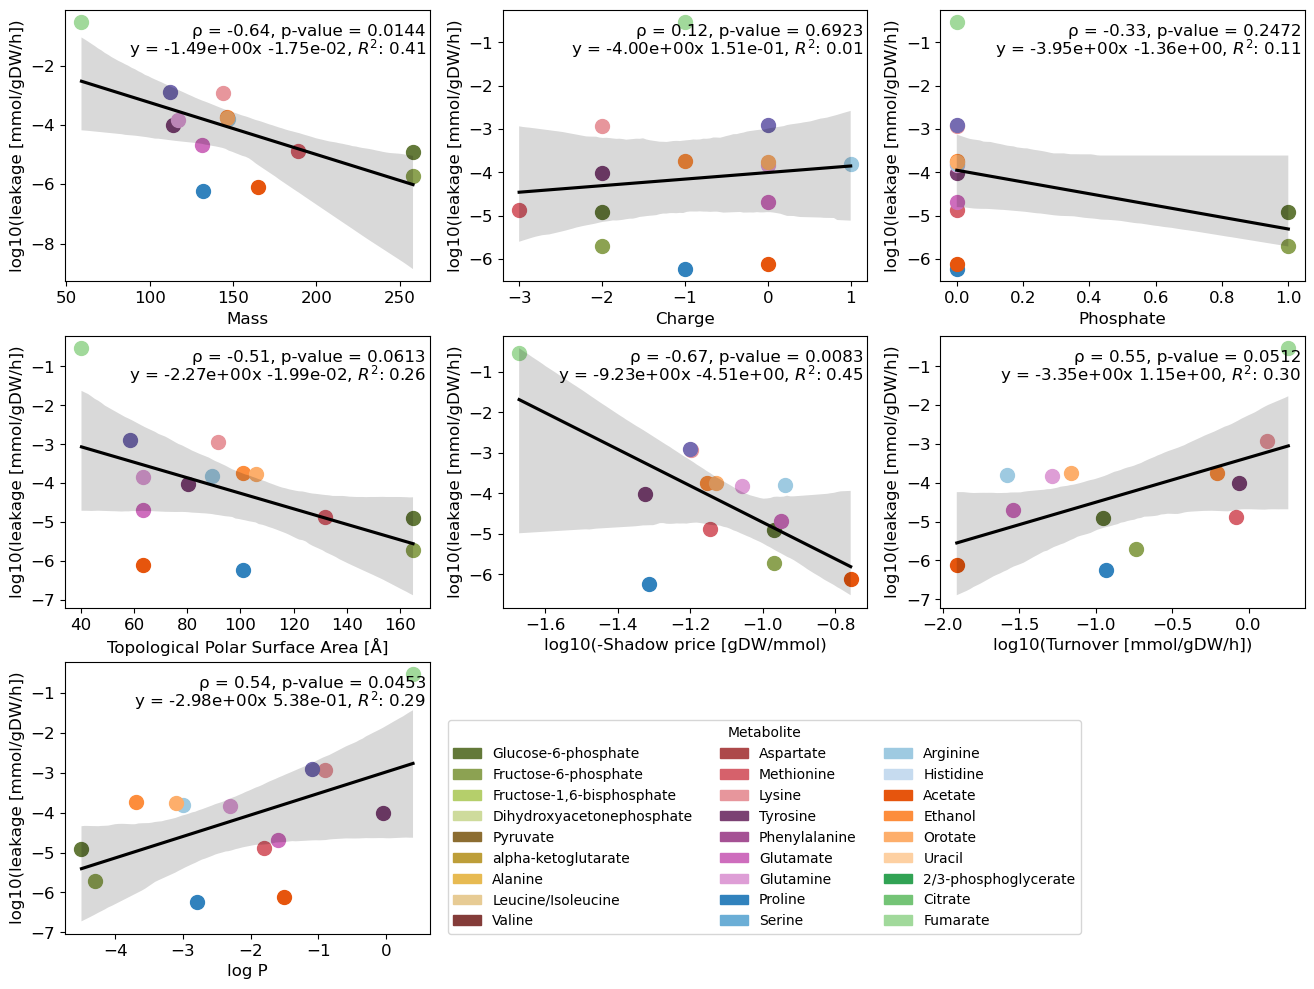

In [190]:
# Create 2x2 sub plots
N = len(cols_for_corr)
gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize = (16, 12))
axes = []
l = 0 
for i in range(3):
    for j in range(3):
        if i*3+j >=N:
            break
        axes.append(fig.add_subplot(gs[i, j])) # row 0, col 0
dft = df.loc[df.Time==7.5, cols_for_corr+['Metabolite name', 'log10(Leakage [mmol/gDW/h])']]
# dft = dft0.loc[~dft0.isna().any(axis =1),:]
l_arr = dft['Metabolite name'].unique()
y_arr = dft['log10(Leakage [mmol/gDW/h])']

corr = []
for i, c in enumerate(cols_for_corr):
    ax = axes[i]
    x_arr = dft[c]
    xy_corr = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if np.isfinite(yj) and np.isfinite(xj):
            xy_corr.append([xj,yj])
        ax.scatter(xj, yj, color = cmap40(j), label = l_arr[j], s = 100)#marker = symbols[i]
    xc = [x[0] for x in xy_corr]
    yc = [x[1] for x in xy_corr]
    # print(xc, yc)
    rho, pval = st.pearsonr(xc,yc)
    # rho, pval = st.pearsonr(x_arr, y_arr)
    corr.append((rho, pval))
    
    axes[i].text(0.99, 0.95, 'ρ = {0:.2f}, p-value = {1:.4f}'.format(rho, pval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = axes[i].transAxes,  fontdict={'size': 12})
    sns.regplot(x=xc, y = yc, ax = axes[i], scatter = False, color = 'k', ci = 95)
    
    X = sm.add_constant(xc)
    model = sm.OLS(yc, X)
    res = model.fit()
    # print(res.summary())
    axes[i].text(0.99, 0.9, r'y = {0:.2e}x {1:0.2e}, $R^2$: {2:.2f}'.format(res.params[0], res.params[1], res.rsquared),
     horizontalalignment='right', verticalalignment='top', transform = axes[i].transAxes, fontdict={'size': 12})
    
    ax.set_xlabel(c,  fontdict={'size': 12})
    ax.set_ylabel('log10(leakage [mmol/gDW/h])',  fontdict={'size': 12})
    ax.tick_params(axis='both', which='major', labelsize=12)
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          # markersize=8, label=t) for m,t in zip(symbols, hours)]
l1 = axes[N-1].legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.tight_layout()

KeyError: "['log10(leakage [mmol/gDW/h])'] not in index"

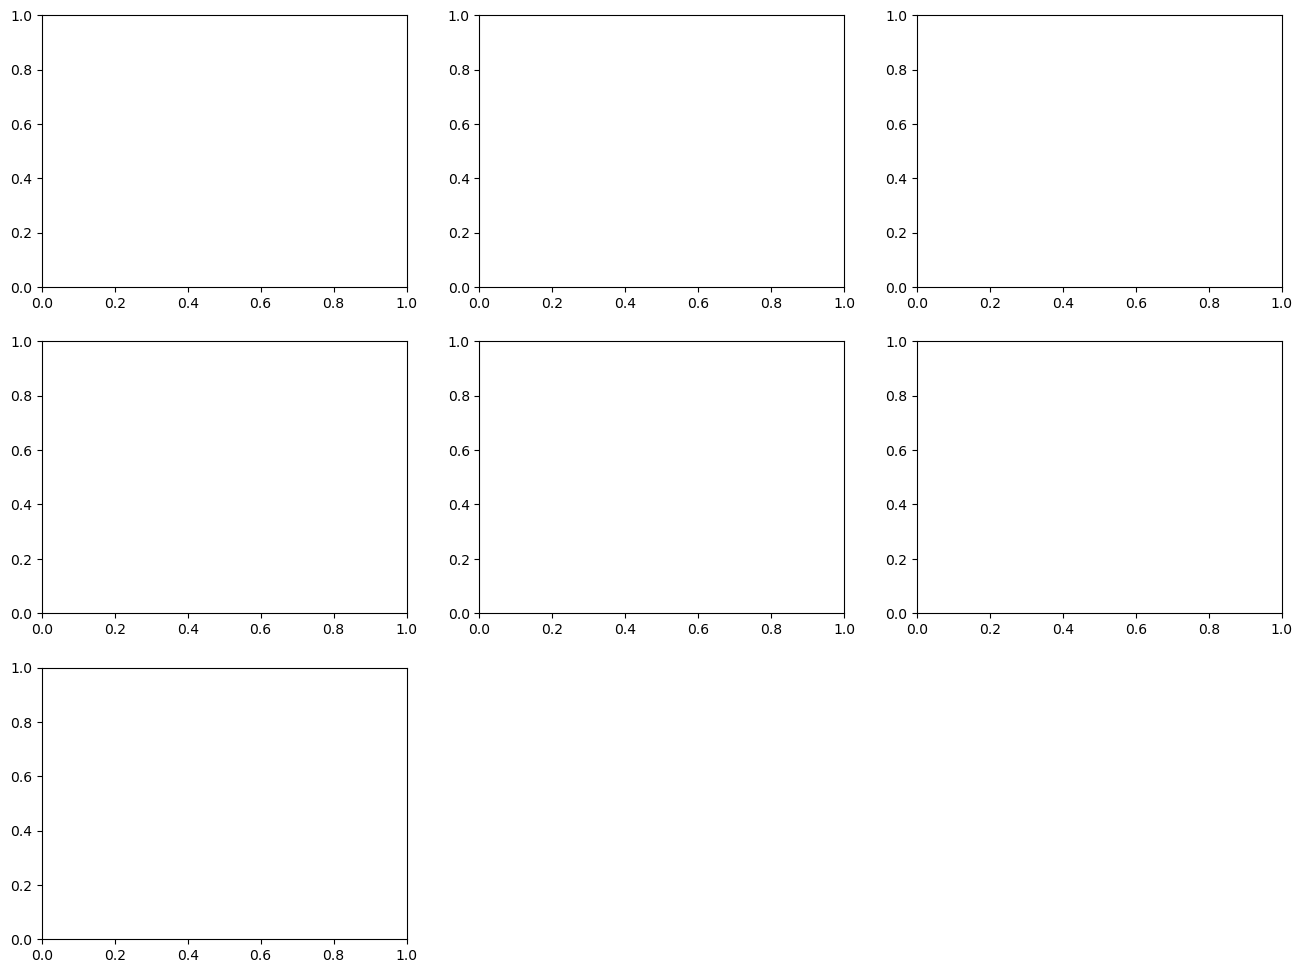

In [189]:
# Create 2x2 sub plots
N = len(cols_for_corr)
gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize = (16, 12))
axes = []
l = 0 
for i in range(3):
    for j in range(3):
        if i*3+j >=N:
            break
        axes.append(fig.add_subplot(gs[i, j])) # row 0, col 0
dft = df.loc[df.Time.isin([5.5, 6.5, 7.5, 8.5, 9.5, 10.5]), cols_for_corr+['Metabolite name', 'log10(leakage [mmol/gDW/h])']]
# dft = dft0.loc[~dft0.isna().any(axis =1),:]
l_arr = list(dft['Metabolite name'])
y_arr = dft['log10(leakage [mmol/gDW/h])']

corr = []
for i, c in enumerate(cols_for_corr):
    ax = axes[i]
    x_arr = dft[c]
    xy_corr = []
    for j, (xj,yj) in enumerate(zip(x_arr, y_arr)):
        if np.isfinite(yj) and np.isfinite(xj):
            xy_corr.append([xj,yj])
            # print(l_arr[j])
            ax.scatter(xj, yj, color = cmap40(j), label = l_arr[j], s = 100)#marker = symbols[i]
    xc = [x[0] for x in xy_corr]
    yc = [x[1] for x in xy_corr]
    
    rho, pval = st.pearsonr(xc,yc)
    # rho, pval = st.pearsonr(x_arr, y_arr)
    corr.append((rho, pval))
    
    axes[i].text(0.99, 0.95, 'ρ = {0:.2f}, p-value = {1:.4f}'.format(rho, pval),
     horizontalalignment='right',
     verticalalignment='top',
     transform = axes[i].transAxes)
    sns.regplot(x=x_arr, y = y_arr, ax = axes[i], scatter = False, color = 'k', ci = 95)
    
    X = sm.add_constant(xc)
    model = sm.OLS(yc, X)
    res = model.fit()
    # print(res.summary())
    axes[i].text(0.99, 0.9, r'y = {0:.2e}x {1:0.2e}, $R^2$: {2:.2f}'.format(res.params[0], res.params[1], res.rsquared),
     horizontalalignment='right', verticalalignment='top', transform = axes[i].transAxes)
    
    ax.set_xlabel(c)
    ax.set_ylabel('log10(leakage [mmol/gDW/h])')
    
patches = [mpatches.Patch(color=cmap40(k), label=mnames[k]) for k in range(len(mnames))]
# patches2 = [mlines.Line2D([], [], color='k', marker=m, linestyle='None',
                          # markersize=8, label=t) for m,t in zip(symbols, hours)]
l1 = axes[N-1].legend(handles=patches, ncol = 3, loc = (1.05,0), title = 'Metabolite')
# plt.tight_layout()

In [188]:
dfc = dft[cols_for_corr+['log10(Leakage [mmol/gDW/h])']]
# P = [organic]/[aqueous])

KeyError: "['Mass', 'Charge', 'Phosphate', 'Topological Polar Surface Area [Å]', 'log10(-Shadow price [gDW/mmol)', 'log10(Turnover [mmol/gDW/h])'] not in index"

In [192]:
rho = df.corr()
pval = df.corr(method=lambda x, y: st.pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Mass,Charge,Phosphate,Topological Polar Surface Area [],Concentration,log P,Leakage (mmol/gDW/h),Time,Glucose,Predicted growth rate,Shadow price,Turnover,Uptake (mmol/gDW/h),log10(Leakage [mmol/gDW/h]),log10(-Shadow price [gDW/mmol),log10(Turnover [mmol/gDW/h]),Shadow price [gDW/mmol],Topological Polar Surface Area [Å]
Mass,1.0***,-0.57***,0.77***,0.94***,0.02,-0.67***,-0.3***,0.04,-0.04,-0.04,-0.32***,-0.09,-0.23***,-0.53***,0.37***,-0.1,-0.32***,0.94***
Charge,-0.57***,1.0***,-0.68***,-0.64***,-0.06,0.05,0.16*,-0.13*,0.1,0.12*,-0.2**,-0.02,0.09,0.25***,0.02,-0.23**,-0.2**,-0.64***
Phosphate,0.77***,-0.68***,1.0***,0.74***,-0.03,-0.57***,-0.1,0.03,-0.04,-0.04,-0.01,0.08,-0.07,-0.36***,0.07,0.16*,-0.01,0.74***
Topological Polar Surface Area [],0.94***,-0.64***,0.74***,1.0***,0.08,-0.67***,-0.31***,0.05,-0.04,-0.05,-0.19**,-0.09,-0.23***,-0.47***,0.29***,-0.03,-0.19**,1.0***
Concentration,0.02,-0.06,-0.03,0.08,1.0***,-0.25***,-0.0,-0.02,0.02,0.02,0.09,0.07,0.01,0.18*,-0.08,0.23**,0.09,0.08
log P,-0.67***,0.05,-0.57***,-0.67***,-0.25***,1.0***,0.21**,0.04,-0.02,-0.04,0.27***,0.05,0.19***,0.44***,-0.28***,0.05,0.27***,-0.67***
Leakage (mmol/gDW/h),-0.3***,0.16*,-0.1,-0.31***,-0.0,0.21**,1.0***,-0.16*,0.15*,0.16*,0.2**,0.35***,nan,0.51***,-0.32***,0.25***,0.2**,-0.31***
Time,0.04,-0.13*,0.03,0.05,-0.02,0.04,-0.16*,1.0***,-0.76***,-0.88***,-0.36***,-0.34***,0.1,-0.37***,0.49***,-0.44***,-0.36***,0.05
Glucose,-0.04,0.1,-0.04,-0.04,0.02,-0.02,0.15*,-0.76***,1.0***,0.94***,0.41***,0.45***,-0.09,0.28***,-0.55***,0.43***,0.41***,-0.04
Predicted growth rate,-0.04,0.12*,-0.04,-0.05,0.02,-0.04,0.16*,-0.88***,0.94***,1.0***,0.44***,0.41***,-0.08,0.33***,-0.57***,0.52***,0.44***,-0.05


# Get transporter info

In [331]:
df_trans = pd.read_csv('e_coli_transporters.csv', index_col=0)

In [345]:
df_trans.loc[df_trans.Membrane == 'inner',:]
dft = df.loc[df.Time.isin([5.5, 6.5, 7.5, 8.5, 9.5, 10.5]), cols_for_corr+['Metabolite name', 'log10(leakage [mmol/gDW/h])', 'Metabolite id']]
mIDs = dft['Metabolite id'].unique()

In [346]:
idx = df_trans['iML1515 metabolite ID'].isin(mIDs)*(df_trans.Membrane == 'inner')
dfT = df_trans.loc[idx,:]

In [347]:
# dfTT = dfT.loc[dfT.Direction.str.contains('Export'),:]

In [348]:
dfT['Transport type'].unique()
other_lst = ['4abut antiporter', 'agm antiporter',
       'orn antiporter', 'pi antiporter', 'succ antiporter', 'ATP-binding cassette transporter']
dfT.loc[dfT['Transport type'].isin(other_lst), 'Transport type'] = 'Other'


/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_20491/145764461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfT.loc[dfT['Transport type'].isin(other_lst), 'Transport type'] = 'Other'


In [349]:
T_dict = {}
for mname in mIDs:
    tmp = dfT.loc[dfT['iML1515 metabolite ID'] == mname]
    if len(tmp)<3 and len(tmp)>0:
        T_dict[mname] = ", ".join(tmp['Transport type'].sort_values().unique())
    elif len(tmp)==0:
        T_dict[mname] = 'None'
    else:
        T_dict[mname] = 'Three or more different transporters'

In [350]:
dft['Transporter'] = dft['Metabolite id'].map(T_dict)
dft.sort_values(by='Transporter', inplace = True)

Text(0.5, 1.0, 'Estimated leakage rates grouped by annotated transporters')

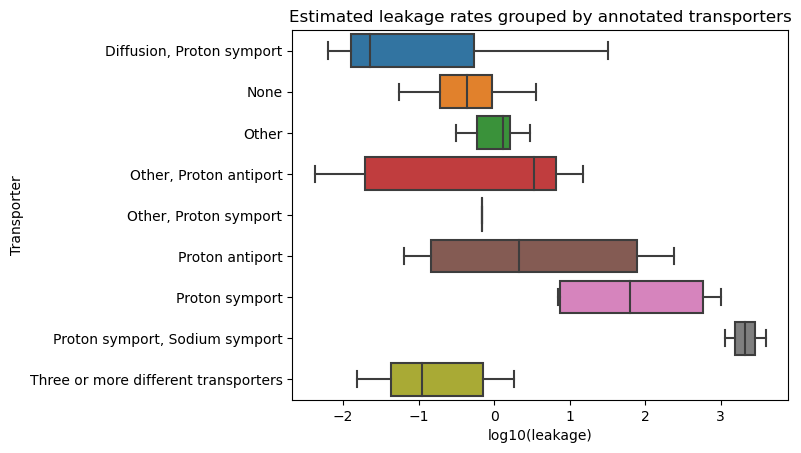

In [353]:
sns.boxplot(data = dft, x = 'log10(leakage [mmol/gDW/h])', y = 'Transporter')
# plt.legend(loc=(1.05,0))
plt.title('Estimated leakage rates grouped by annotated transporters')

# Plot a cumulative distribution of shadow prices


In [651]:
model = cobra.io.read_sbml_model('../../models/e_coli/momentiJO1366.xml')
model.solver = 'gurobi'
# model.reactions.DHAPT.knock_out()
# model.reactions.THRA.knock_out()
# model.reactions.THRA2.knock_out()
# model.reactions.F6PA_TG_forward.knock_out()
# Speculations
# model.reactions.PFL.knock_out()
#I'm more and more conviced that PFL is not active in aerobic conditions
# https://doi.org/10.1016/j.jbc.2021.101423
model.reactions.EX_glc__D_e.lower_bound = -6
solution = cobra.flux_analysis.pfba(model)
print(model.summary(solution))

Objective
1.0 BIOMASS_Ec_iJO1366_core_53p95M = 0.5732271225866007

Uptake
------
Metabolite     Reaction      Flux  C-Number  C-Flux
 prot_pool  ER_pool_TG_     0.095         0   0.00%
     ca2_e     EX_ca2_e  0.002984         0   0.00%
      cl_e      EX_cl_e  0.002984         0   0.00%
 cobalt2_e EX_cobalt2_e 1.433E-05         0   0.00%
     cu2_e     EX_cu2_e 0.0004064         0   0.00%
     fe2_e     EX_fe2_e  0.009207         0   0.00%
  glc__D_e  EX_glc__D_e         6         6 100.00%
       k_e       EX_k_e    0.1119         0   0.00%
     mg2_e     EX_mg2_e  0.004973         0   0.00%
     mn2_e     EX_mn2_e 0.0003961         0   0.00%
    mobd_e    EX_mobd_e 7.395E-05         0   0.00%
     nh4_e     EX_nh4_e     6.191         0   0.00%
     ni2_e     EX_ni2_e 0.0001852         0   0.00%
      o2_e      EX_o2_e     11.25         0   0.00%
      pi_e      EX_pi_e     0.553         0   0.00%
     so4_e     EX_so4_e    0.1446         0   0.00%
     zn2_e     EX_zn2_e 0.0001955  

In [652]:
sp = leakage.estimate_shadow_prices(model, delta=0.1)
# solution = model.optimize()
# sp = solution.shadow_prices

In [653]:
Ssp = pd.Series(sp)

In [654]:
solution = cobra.flux_analysis.pfba(model)
# solution = model.optimize()
turnover_dict = {}
for m in model.metabolites:
    if m.compartment == 'c':
        turnover_dict[m.id] = m.summary(solution).producing_flux['flux'].sum()

In [700]:
sp_list = []
met_ids = []
for m in model.metabolites:
    # Remove non-organic compounds
    if m.id in ['hco3_c', 'co2_c']:
        continue
    if m.compartment == 'c':
        if 'C' in m.elements.keys():
            if m.formula_weight and (m.formula_weight < 500):
                if turnover_dict[m.id] >0:
                    if 'C' in m.elements.keys():
                        if sp[m.id] < 0:
                            met_ids.append(m.id)
                            sp_list.append(sp[m.id])

/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/cobra/core/metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
/Users/ssulheim/opt/anaconda3/lib/python3.9/site-packages/cobra/core/metabolite.py:191: UserWarning: The element 'X' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")


In [701]:
selected_sp = pd.Series(sp_list, index = met_ids)
selected_sp.dropna(inplace = True)

In [702]:
selected_sp.sort_values(inplace = True, ascending=False)

In [703]:
model.metabolites.fdp_c

Metabolite identifier,fdp_c
Name,"D-Fructose 1,6-bisphosphate"
Memory address,0x7f97c19dc3d0
Formula,C6H10O12P2
Compartment,c
In 5 reaction(s),"PFK, FBA_TG_forward, FRUK, FBP, FBA_TG_reverse"


In [704]:
max_leak = df.loc[:, ['Metabolite name','Metabolite id', 'log10(leakage [mmol/gDW/h])']].groupby('Metabolite name').max()
smax = max_leak['log10(leakage [mmol/gDW/h])'].max()
smin = max_leak['log10(leakage [mmol/gDW/h])'].min()

In [706]:
max_leak.set_index('Metabolite id', inplace = True)

In [707]:
selected_sp.index = [m[:-2] for m in selected_sp.index]

fdp
ru5p__L
xu5p__L
ura


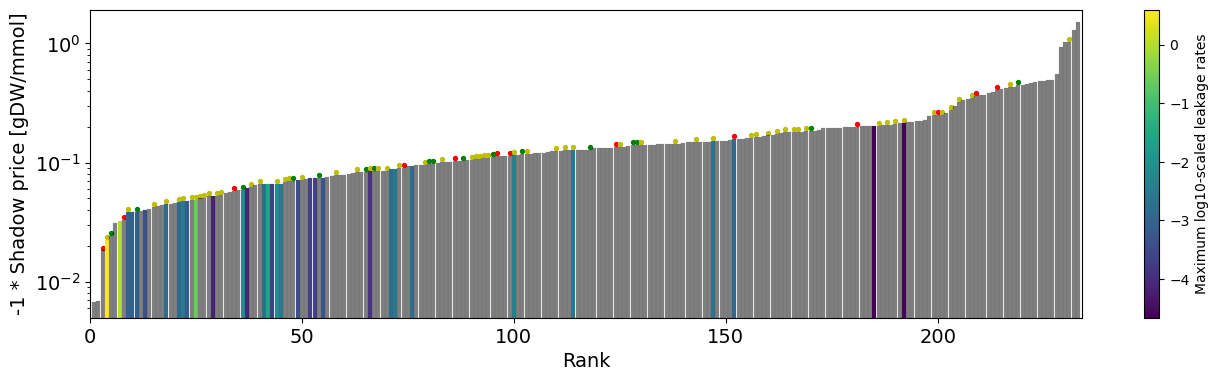

In [ ]:
# fig, [ax1, ax2] = plt.subplots(1,2, figsize = (16,6))
fig, ax = plt.subplots(1, figsize = (16,4))

norm = plt.Normalize(vmin=smin, vmax=smax)
#norm = matplotlib.colors.BoundaryNorm([0,1,2,3], cmap.N, extend='neither')
cmap = plt.cm.viridis
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

consumed_sp = []
produced_sp = []
both_sp = []
max_leak_dict = {}
for i, row in max_leak.iterrows():
    leak = row['log10(leakage [mmol/gDW/h])']
    met_ids = i.split(', ')
    for m_id in met_ids:
        try:
            met = selected_sp[m_id]
        except KeyError:
            print(m_id)
        else:
            max_leak_dict[m_id]=leak


for i, (m_id, sp_i) in enumerate(selected_sp.items()):
    try:
        leak_i = max_leak_dict[m_id]
    except KeyError:
        ax.plot([i+1,i+1], [0, -sp_i], c = 'k', alpha = 0.5, lw = 3) 
    else:
        ax.plot([i+1, i+1], [0, -sp_i], lw = 3, c = sm.to_rgba(leak_i))# colouring is wrong , lw = 2)#, cmap = cmap, norm = norm)


        
    
#     # # Make a seperate plot for the 10% least expensive
#     # if i < first_x:
    #     if leak_i > 0:
    #         ax2.scatter(i, sp_abs, s = 50, c = np.log(leak_i), cmap = cmap, norm = norm)
    #     else:
    #         ax2.scatter(i, sp_abs,s=10, c = 'k', alpha = 0.5)
    #     ax2.annotate(m_id[:-2], (i+0.5, sp_abs*0.9))

    
    
#ax.scatter(np.arange(len(selected_sp)), np.abs(selected_sp), s = 10)
ax.set_yscale('log')
#ax1.set_xlim(0,400)
# ax2.set_yscale('log')
# ax2.set_xlim(0, first_x+5)
ax.set_ylabel('-1 * Shadow price [gDW/mmol]', fontdict={'size':14})
# ax2.set_ylabel('-1 * Shadow price')
ax.set_xlabel('Rank', fontdict={'size':14})
# ax2.set_xlabel('Rank')
ax.set_xlim(0, i+2)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.colorbar(sm, ax = ax, label = "Maximum log10-scaled leakage rates")
# plt.savefig('Rank of shadow price ecoli knock outs epsilon 001.png')

In [1088]:
st.ttest_ind(both_sp, consumed_sp, equal_var=False)

Ttest_indResult(statistic=-0.18811248160642585, pvalue=0.8532756743235743)

# Predict!

In [193]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, ARDRegression, BayesianRidge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [194]:
dft = df.loc[df.Time.isin(np.arange(1.5, 7, 1)), :]

columns = cols_for_corr
# columns = ['Shadow price [gDW/mmol]', 'log10(Turnover [mmol/gDW/h])', 'log P']
columns = ['log10(-Shadow price [gDW/mmol)', 'Mass', 'Charge', 'log P', 'Topological Polar Surface Area [Å]']
# columns = ['log10(-Shadow price [gDW/mmol])']
tmp = dft.loc[~dft['Leakage (mmol/gDW/h)'].isna(),columns+['log10(Leakage [mmol/gDW/h])', 'Metabolite name']]
# tmp['log10(Turnover [mmol/gDW/h])'].fillna(0, inplace = True) #tmp['log10(Turnover)']
tmp.dropna(inplace=True)
y = tmp['log10(Leakage [mmol/gDW/h])']
# X = tmp['Shadow price [gDW/mmol]']


In [195]:
# data = StandardScaler().fit_transform(tmp[columns])
# X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1)#, random_state=40)


-0.0961711237064824


Text(-3, -6, '$R^2$ LOO: -0.10, $R^2$: 0.45')

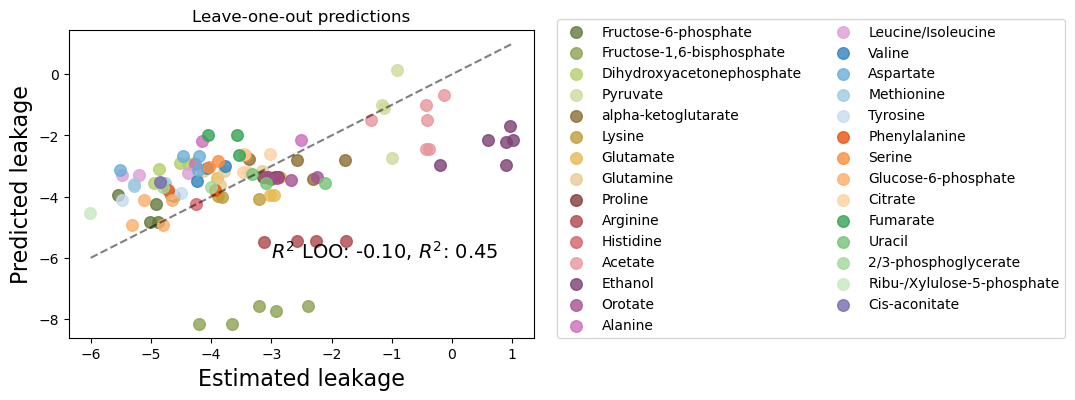

In [196]:
fig, ax = plt.subplots(1, figsize = (6, 4))
ypreds = []
yvals = []
mnames = tmp['Metabolite name'].unique()
for i, mname in enumerate(mnames):
    idx = tmp['Metabolite name']==mname
    linear_reg = LinearRegression(fit_intercept = True).fit(np.array(tmp.loc[~idx, columns]),y[~idx])
    Xi = np.array(tmp.loc[idx, columns])#reshape(1,-1)
    yi = linear_reg.predict(Xi)
    ypreds += list(yi)
    yvals += list(y[idx])
    ax.scatter(y[idx], yi, color = cmap40(i), label = mname,s = 70, alpha = 0.8)
# plt.scatter(ypreds, y)
l = np.linspace(-6,1)
plt.plot(l,l,c='k',ls = '--', alpha = 0.5)
plt.legend(ncol = 2, loc = (1.05, 0))
ypreds = np.array(ypreds)
yvals = np.array(yvals)

SSres = np.sum((ypreds-yvals)**2)
SStot = np.sum((yvals-np.mean(yvals))**2)
R2 = 1-(SSres/SStot)
print(R2)

X = sm.add_constant(np.array(tmp[columns]))
model = sm.OLS(y, X)
res = model.fit()

plt.xlabel('Estimated leakage', fontdict={'size': 16})
plt.ylabel('Predicted leakage', fontdict={'size': 16})
plt.title('Leave-one-out predictions')
plt.text(-3, -6, "$R^2$ LOO: {0:.2f}, $R^2$: {1:.2f}".format(R2, res.rsquared), fontdict={'size': 14})

In [197]:
all_sets = [list(x) for x in utils.powerset(cols_for_corr) if len(x)]

In [199]:
R2_arr = np.zeros(len(all_sets))
dft = df.loc[df.Time.isin(np.arange(1.5, 6, 1)), :]
R2_full = []
for j, cols in enumerate(all_sets):
    tmp = dft.loc[~dft['Leakage (mmol/gDW/h)'].isna(),cols+['log10(Leakage [mmol/gDW/h])', 'Metabolite name']]
    # tmp['log10(Turnover [mmol/gDW/h])'].fillna(0, inplace = True) #tmp['log10(Turnover)']
    tmp.replace([np.inf, -np.inf], np.nan, inplace=True)
    tmp.dropna(inplace=True)
    tmp.reset_index(inplace = True)
    y = tmp['log10(Leakage [mmol/gDW/h])']
    ypreds = []
    yvals = []
    mnames = tmp['Metabolite name'].unique()
    for i, mname in enumerate(mnames):
        idx = tmp['Metabolite name']==mname
        linear_reg = LinearRegression(fit_intercept = True).fit(np.array(tmp.loc[~idx, cols]),y[~idx])
        Xi = np.array(tmp.loc[idx, cols])#reshape(1,-1)
        yi = linear_reg.predict(Xi)
        ypreds += list(yi)
        yvals += list(y[idx])
        
    X = sm.add_constant(np.array(tmp[cols]))
    model = sm.OLS(y, X)
    res = model.fit()
    R2_full.append(res.rsquared)
       
    ypreds = np.array(ypreds)
    yvals = np.array(yvals)

    SSres = np.sum((ypreds-yvals)**2)
    SStot = np.sum((yvals-np.mean(yvals))**2)
    R2 = 1-(SSres/SStot)
    R2_arr[j] = R2
    
  


In [121]:
labels = []
lengths = []
for cols in all_sets:
    cols = list(cols)
    lengths.append(len(cols))
    if len(cols) > 1:
        n = ", ".join(cols)
        labels.append(n)
    else:
        labels.append(cols[0])
    
R2df = pd.DataFrame([labels, R2_arr, R2_full, lengths]).T
R2df.columns = ['Label', 'R2 LOO', 'R2', 'N params']

In [122]:
R2df.sort_values('R2 LOO', ascending=False, inplace=True)
R2df.head(12)

,Label,R2 LOO,R2,N params
56,"Phosphate, log10(-Shadow price [gDW/mmol), log...",0.523836,0.671145,3
76,"Mass, Phosphate, log10(-Shadow price [gDW/mmol...",0.49804,0.671792,4
108,"Mass, Phosphate, Topological Polar Surface Are...",0.487995,0.688764,5
52,"Charge, log10(Turnover [mmol/gDW/h]), log P",0.479103,0.633046,3
88,"Charge, Phosphate, log10(Turnover [mmol/gDW/h]...",0.478706,0.663933,4
11,"Mass, log10(Turnover [mmol/gDW/h])",0.457904,0.603662,2
86,"Charge, Phosphate, log10(-Shadow price [gDW/mm...",0.455271,0.671339,4
93,"Phosphate, Topological Polar Surface Area [Å],...",0.452295,0.673958,4
96,"Phosphate, log10(-Shadow price [gDW/mmol), log...",0.447202,0.671539,4
72,"Mass, Charge, log10(Turnover [mmol/gDW/h]), log P",0.441517,0.656296,4


In [123]:
for x in R2df.head(10)['Label']:
    print(x)

Phosphate, log10(-Shadow price [gDW/mmol), log10(Turnover [mmol/gDW/h])
Mass, Phosphate, log10(-Shadow price [gDW/mmol), log10(Turnover [mmol/gDW/h])
Mass, Phosphate, Topological Polar Surface Area [Å], log10(-Shadow price [gDW/mmol), log10(Turnover [mmol/gDW/h])
Charge, log10(Turnover [mmol/gDW/h]), log P
Charge, Phosphate, log10(Turnover [mmol/gDW/h]), log P
Mass, log10(Turnover [mmol/gDW/h])
Charge, Phosphate, log10(-Shadow price [gDW/mmol), log10(Turnover [mmol/gDW/h])
Phosphate, Topological Polar Surface Area [Å], log10(-Shadow price [gDW/mmol), log10(Turnover [mmol/gDW/h])
Phosphate, log10(-Shadow price [gDW/mmol), log10(Turnover [mmol/gDW/h]), log P
Mass, Charge, log10(Turnover [mmol/gDW/h]), log P


In [117]:
# Mass, Charge, Topological Polar Surface Area [Å], log10(-Shadow price [gDW/mmol]), log P

Text(0, 0.5, '$R^2$ for leave-one-out CV')

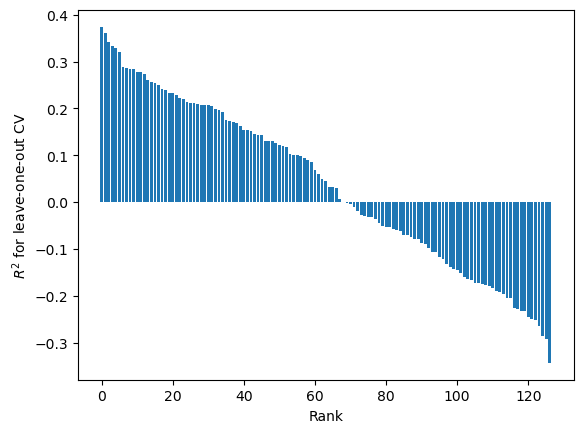

In [118]:
plt.bar(np.arange(len(R2_arr)), R2df['R2 LOO'])
plt.xlabel('Rank')
plt.ylabel('$R^2$ for leave-one-out CV')

In [778]:
ypreds = []
for i, idx in enumerate(tmp.index):
    linear_reg = LinearRegression(fit_intercept = True).fit(np.array(tmp[columns].drop(idx)),y.drop(idx))
    Xi = np.array(tmp.loc[idx, columns]).reshape(1,-1)
    ypreds.append(linear_reg.predict(Xi)[0])

plt.scatter(ypreds, y)
l = np.linspace(-5,-2)
plt.plot(l,l,c='k',ls = '--', alpha = 0.5)

SSres = np.sum((ypreds-y)**2)
SStot = np.sum((y-np.mean(y))**2)
R2 = 1-(SSres/SStot)
print(R2)

ValueError: Expected 2D array, got 1D array instead:
array=[336.083922    -4.           2.         215.          -1.22312431
   0.          -5.9       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [739]:
Xi

array([[-1.72616154,  0.96220954, -1.2338501 ,  0.79949215, -1.28492111,
         0.80697458]])

In [1025]:
X = sm.add_constant(tmp[columns])
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:     log10(Leakage [mmol/gDW/h])   R-squared:                       0.413
Model:                                     OLS   Adj. R-squared:                  0.403
Method:                          Least Squares   F-statistic:                     42.89
Date:                         Mon, 26 Jun 2023   Prob (F-statistic):           1.37e-08
Time:                                 11:45:44   Log-Likelihood:                -89.887
No. Observations:                           63   AIC:                             183.8
Df Residuals:                               61   BIC:                             188.1
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

0.6336057273870643


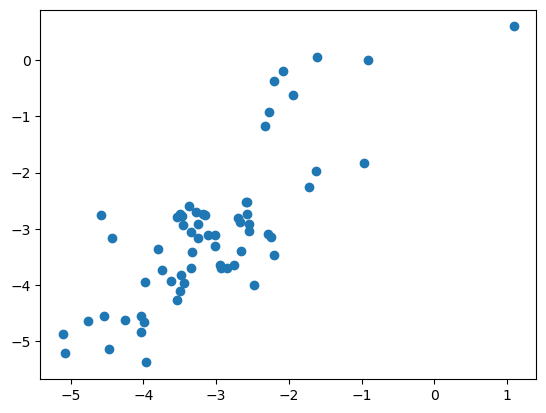

In [763]:
plt.scatter(res.predict(), y)
ypreds = res.predict()
SSres = np.sum((ypreds-y)**2)
SStot = np.sum((y-np.mean(y))**2)
R2 = 1-(SSres/SStot)
print(R2)

In [1023]:
X = sm.add_constant(StandardScaler().fit_transform(tmp[columns]))
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:     log10(Leakage [mmol/gDW/h])   R-squared:                       0.413
Model:                                     OLS   Adj. R-squared:                  0.403
Method:                          Least Squares   F-statistic:                     42.89
Date:                         Mon, 26 Jun 2023   Prob (F-statistic):           1.37e-08
Time:                                 11:45:14   Log-Likelihood:                -89.887
No. Observations:                           63   AIC:                             183.8
Df Residuals:                               61   BIC:                             188.1
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [1028]:
np.log10

<ufunc 'log10'>

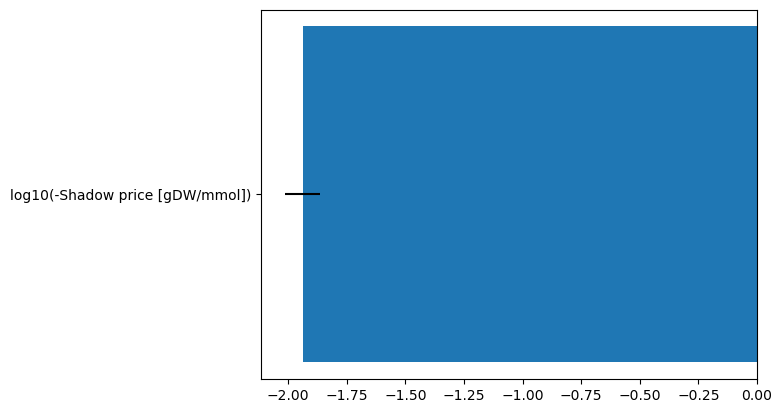

In [1027]:
N = 100
coefficients = np.zeros((2,N))*np.nan

R2_arr_oo = np.zeros(N)
R2_arr = np.zeros(N)
R2_arr_test = np.zeros(N)
# data = StandardScaler().fit_transform(tmp[columns])
data = sm.add_constant(tmp[columns])

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.05)#, random_state=40)
    linear_reg = LinearRegression(fit_intercept = True).fit(X_train, y_train)
    coefficients[:, i] = linear_reg.coef_
    R2_arr[i] = linear_reg.score(X_train, y_train)
    R2_arr_oo[i] = linear_reg.score(X_test, y_test)

plt.barh(columns, coefficients.mean(axis=1), xerr = coefficients.std(axis=1))
plt.show()

In [600]:
X_test.shape

(2, 2)

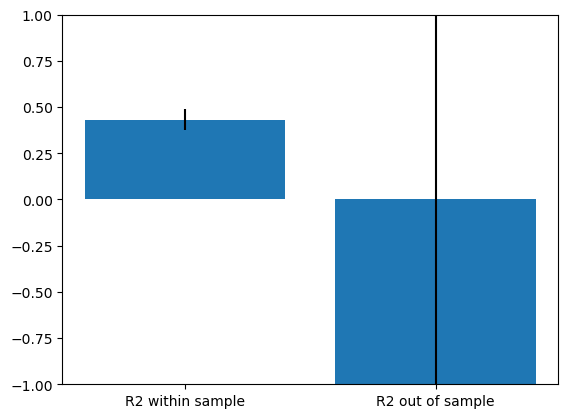

In [601]:
fig, ax = plt.subplots(1)
ax.bar(["R2 within sample", "R2 out of sample"], [R2_arr.mean(), R2_arr_oo.mean()], yerr = [R2_arr.std(), R2_arr_oo.std()])
ax.set_ylim(-1, 1)
plt.show()

In [443]:
dft = df.loc[df.Time==6.5, :]
tmp = dft.loc[~dft.isna().any(axis =1),:]
y = tmp['log10(leakage [mmol/gDW/h])']
X = tmp['Shadow price [gDW/mmol]']


In [444]:
X = np.array(X).reshape(-1,1)
# x = np.array(y).reshape(-1,1)

In [445]:
lr = linear_model.LinearRegression(fit_intercept = True)
ransac = linear_model.RANSACRegressor()

In [446]:
lr.fit(X,y)
ransac.fit(X,y)

RANSACRegressor()

In [452]:
line_X = np.linspace(X.min(), X.max(), 10)[:, np.newaxis]

In [453]:
y1 = lr.predict(line_X)
y2 = ransac.predict(line_X)

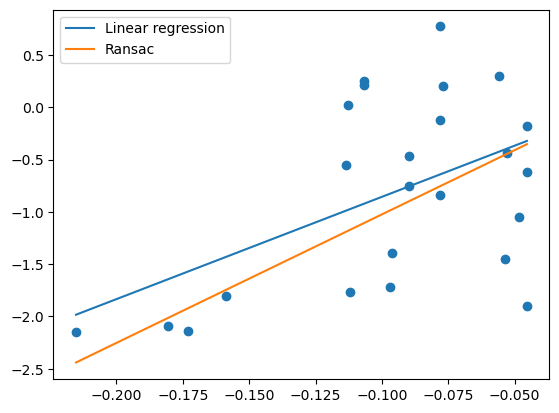

In [457]:
plt.scatter(X,y)
plt.plot(line_X, y1, label = 'Linear regression')
plt.plot(line_X, y2, label = 'Ransac')
plt.legend()

In [451]:
y1

array([-1.98323264])